# <Center> Cardiovascular disease case study <Center>

## 1. Introduction

This data is from a Kaggle project <a href = "https://www.kaggle.com/ronitf/heart-disease-uci"> Heart Disease UCI </a>.

### 1.1 Goal
Predict the presence or absence of cardiovascular disease using the patients examination results. Descriptions of the data are as follows.

### 1.2 Data description
There are 2 types of input features:
- *Objective*: factual information;
- *Examination*: results of medical examination

| Feature | Variable Type | Variable      | Value Type |
|---------|--------------|---------------|------------|
| Age | Objective Feature | age | int (years) |
| Gender | Objective Feature | sex | 0: female; 1: male |
| Chest pain type | Examination Feature | cp | 0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic |
| Resting blood pressure | Examination Feature | trestbps | int (mm Hg on addmission tot he hospital) |
| Cholesterol | Examination Feature | chol | int (in mg/dl) |
| Fasting blood sugar (> 120 mg/dl) | Examination Feature | fbs | 0: false, 1: true |
| Resting electrocardiographic measurement | Examination Feature | restecg | 0: normal, 1: having ST-T wave abnormality, 2: showing probable or definite left ventricular hypertrophy by Estes' criteria |
| Maximum heart rate achieved | Examination Feature | thalach | int |
| Exercise induced angina | Examination Feature | exang | 0: no, 1: yes |
| ST depression induced by exercise relative to rest | Examination Feature | oldpeak | int |
| Slope of the peak exercise ST segment | Examination Feature | slope | 0: upsloping, 1: flat, 2: downsloping |
| The number of major vessels | Examination Feature | ca | categorical code (0-3) |
| Thalassemia (blood disorder) | Examination Feature | thal | 1: normal; 2: fixed defect; 3: reversable defect |
| Presence or absence of cardiovascular disease | Target Variable | target | 0: no, 1: yes |

### 1.3 Hypothesis
According to Mayo Clinic, risk factors for developing heart disease include:
1. age
2. sex
3. family history
4. smoking
5. poor diet
6. high blood pressure
7. high blood cholesterol levels
8. diabetes
9. obesity
10. physical inactivity
11. stress
12. poor dental health
Among these risk factors, we have 1, 2, 6, 7 in our data, so we would expect these varabiales to rank higher in importance when predicting heart disease in our models.

## 2. Preliminary Analysis

### 2.1 Install all the libraries that will be needed:

In [1]:
# Import all required modules
import pandas as pd
import numpy as np

# Disable warnings
import warnings
warnings.filterwarnings("ignore")

# Import plotting modules
import seaborn as sns
sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline

# Import modeling modules
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler # to scale numerical vairables
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import NuSVC, SVC

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, fbeta_score

import os
print (os.listdir("../Cardiovascular disease case study/input"))

['heart.csv']


Set up `seaborn` library for visual analysis"

In [2]:
# Tune the visual settings for figures in `seaborn`
sns.set_context(
    "notebook", 
    font_scale=1.5,       
    rc={ 
        "figure.figsize": (11, 8), 
        "axes.titlesize": 18 
    }
)

from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8

### 2.2 Load and check data

In [3]:
# Read the data
df = pd.read_csv('../Cardiovascular disease case study/input/heart.csv')
print('Dataset size:', df.shape)
df.head()

Dataset size: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 2.3 Clean data

#### 2.3.1 Manipulation

Column names and categorical coding are meaningless. To better interpret the results, I am going to change them to meaningful names.

In [4]:
df.columns = ['age', 'sex', 'chest_pain_type', 'rest_blood_pressure', 'cholestoral', 
              'fasting_blood_sugar', 'rest_ecg', 'heart_rate_peak', 'exercise_angina',
             'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']
df.head()

,age,sex,chest_pain_type,rest_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,heart_rate_peak,exercise_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


| Feature | Variable Type | Variable | Variable New Name | Value Type |
|---------|--------------|---------------|------------|------------|
| Age | Objective Feature | age | age |int (years) |
| Gender | Objective Feature | sex | sex | 0: female; 1: male |
| Chest pain type | Examination Feature | cp | chest_pain_type | 0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic |
| Resting blood pressure | Examination Feature | trestbps | rest_blood_pressure | int (mm Hg on addmission tot he hospital) |
| Cholesterol | Examination Feature | chol | cholestoral | int (in mg/dl) |
| Fasting blood sugar (> 120 mg/dl) | Examination Feature | fbs | fasting_blood_sugar | 0: false, 1: true |
| Resting electrocardiographic measurement | Examination Feature | restecg | rest_ecg | 0: normal, 1: having ST-T wave abnormality, 2: showing probable or definite left ventricular hypertrophy by Estes' criteria |
| Maximum heart rate achieved | Examination Feature | thalach | heart_rate_peak | int |
| Exercise induced angina | Examination Feature | exang | exercise_angina | 0: no, 1: yes |
| ST depression induced by exercise relative to rest | Examination Feature | oldpeak | st_depression | int |
| Slope of the peak exercise ST segment | Examination Feature | slope | st_slope | 0: upsloping, 1: flat, 2: downsloping |
| The number of major vessels | Examination Feature | ca | num_major_vessels | categorical code (0-3) |
| Thalassemia (blood disorder) | Examination Feature | thal | thalassemia | 1: normal; 2: fixed defect; 3: reversable defect 
| Presence or absence of cardiovascular disease | Target Variable | target | target | 0: no, 1: yes |


In [5]:
df.dtypes

age                      int64
sex                      int64
chest_pain_type          int64
rest_blood_pressure      int64
cholestoral              int64
fasting_blood_sugar      int64
rest_ecg                 int64
heart_rate_peak          int64
exercise_angina          int64
st_depression          float64
st_slope                 int64
num_major_vessels        int64
thalassemia              int64
target                   int64
dtype: object

Some of the variables should be categorical:

In [6]:
df_cat = df.copy()

df_cat['sex'] = df.sex.astype('category')
df_cat['chest_pain_type'] = df.chest_pain_type.astype('category')
df_cat['fasting_blood_sugar'] = df.fasting_blood_sugar.astype('category')
df_cat['rest_ecg'] = df.rest_ecg.astype('category')
df_cat['exercise_angina'] = df.exercise_angina.astype('category')
df_cat['st_slope'] = df.st_slope.astype('category')
# df_cat['num_major_vessels'] = df.num_major_vessels.astype('category')
df_cat['thalassemia'] = df.thalassemia.astype('category')

In [7]:
df_cat.dtypes

age                       int64
sex                    category
chest_pain_type        category
rest_blood_pressure       int64
cholestoral               int64
fasting_blood_sugar    category
rest_ecg               category
heart_rate_peak           int64
exercise_angina        category
st_depression           float64
st_slope               category
num_major_vessels         int64
thalassemia            category
target                    int64
dtype: object

In [8]:
df.dtypes

age                      int64
sex                      int64
chest_pain_type          int64
rest_blood_pressure      int64
cholestoral              int64
fasting_blood_sugar      int64
rest_ecg                 int64
heart_rate_peak          int64
exercise_angina          int64
st_depression          float64
st_slope                 int64
num_major_vessels        int64
thalassemia              int64
target                   int64
dtype: object

In [9]:
df.isnull().sum() #check if there is any missing data

age                    0
sex                    0
chest_pain_type        0
rest_blood_pressure    0
cholestoral            0
fasting_blood_sugar    0
rest_ecg               0
heart_rate_peak        0
exercise_angina        0
st_depression          0
st_slope               0
num_major_vessels      0
thalassemia            0
target                 0
dtype: int64

There is no missing data.

#### 2.3.2 Feature distribution
Next, look at the distribution of the categorical features.

In [10]:
numerical = ['age', 'rest_blood_pressure', 'cholestoral', 'heart_rate_peak', 
             'st_depression']
categorical = df_cat.drop(columns = numerical).columns.tolist()
categorical

['sex',
 'chest_pain_type',
 'fasting_blood_sugar',
 'rest_ecg',
 'exercise_angina',
 'st_slope',
 'num_major_vessels',
 'thalassemia',
 'target']

In [11]:
for i in categorical:
    print(i)
    print(df_cat[i].value_counts())
    print(20 * "-")

sex
1    207
0     96
Name: sex, dtype: int64
--------------------
chest_pain_type
0    143
2     87
1     50
3     23
Name: chest_pain_type, dtype: int64
--------------------
fasting_blood_sugar
0    258
1     45
Name: fasting_blood_sugar, dtype: int64
--------------------
rest_ecg
1    152
0    147
2      4
Name: rest_ecg, dtype: int64
--------------------
exercise_angina
0    204
1     99
Name: exercise_angina, dtype: int64
--------------------
st_slope
2    142
1    140
0     21
Name: st_slope, dtype: int64
--------------------
num_major_vessels
0    175
1     65
2     38
3     20
4      5
Name: num_major_vessels, dtype: int64
--------------------
thalassemia
2    166
3    117
1     18
0      2
Name: thalassemia, dtype: int64
--------------------
target
1    165
0    138
Name: target, dtype: int64
--------------------


`thalassemia` somehow has 4 categories, with 2 rows of data falling in the undefined category `0`

In [12]:
df_cat.loc[df_cat['thalassemia']== 0]

,age,sex,chest_pain_type,rest_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,heart_rate_peak,exercise_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


I am going to remove these two rows of data since they are meaningless with feature `thalassemia`.

In [13]:
df_cat = df_cat[df_cat['thalassemia'] != 0]
df_cat['thalassemia'] = df_cat.thalassemia.cat.remove_unused_categories()

In [14]:
df_cat.loc[df_cat['thalassemia']== 0]

,age,sex,chest_pain_type,rest_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,heart_rate_peak,exercise_angina,st_depression,st_slope,num_major_vessels,thalassemia,target


In [15]:
for i in categorical:
    print(i)
    print(df_cat[i].value_counts())
    print(20 * "-")

sex
1    206
0     95
Name: sex, dtype: int64
--------------------
chest_pain_type
0    142
2     86
1     50
3     23
Name: chest_pain_type, dtype: int64
--------------------
fasting_blood_sugar
0    257
1     44
Name: fasting_blood_sugar, dtype: int64
--------------------
rest_ecg
1    151
0    146
2      4
Name: rest_ecg, dtype: int64
--------------------
exercise_angina
0    203
1     98
Name: exercise_angina, dtype: int64
--------------------
st_slope
2    141
1    139
0     21
Name: st_slope, dtype: int64
--------------------
num_major_vessels
0    173
1     65
2     38
3     20
4      5
Name: num_major_vessels, dtype: int64
--------------------
thalassemia
2    166
3    117
1     18
Name: thalassemia, dtype: int64
--------------------
target
1    164
0    137
Name: target, dtype: int64
--------------------


### 2.4 Exploratory analysis



#### 2.4.1 Categorical variables

First, take a look at the distribution of the categorical variables.

Convert the data into long format and plot the value counts of each categorical variable.

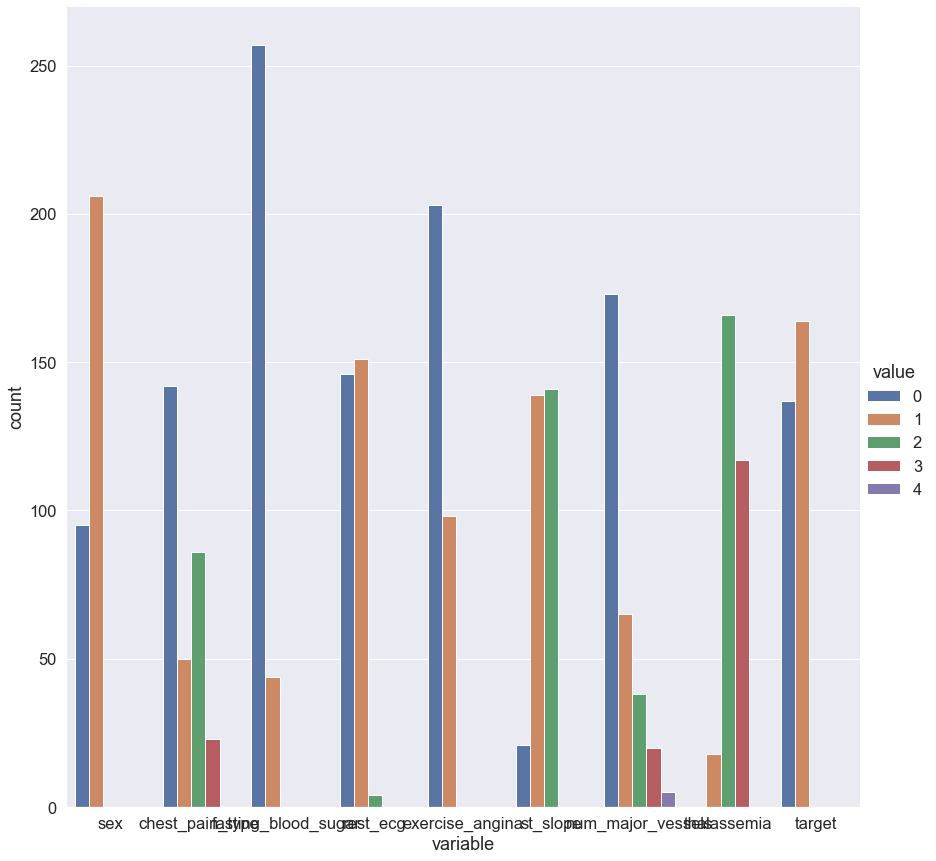

In [16]:
df_uniques = pd.melt(frame = df_cat, value_vars = categorical)
df_uniques = pd.DataFrame(df_uniques.groupby(['variable',
                                              'value'])['value'].count())\
    .sort_index(level = [0, 1])\
    .rename(columns = {'value' : 'count'})\
    .reset_index()

sns.factorplot(x = 'variable', y = 'count', hue = 'value',
              data = df_uniques, kind = 'bar', size = 12,
              order = categorical);

`target` is somewhat imbalanced. Look at value count in each level of `target`.

In [17]:
df_cat['target'].value_counts()

1    164
0    137
Name: target, dtype: int64

Not too imbalanced.

Split the data and compare the number of patients without and with heart disease.

In [18]:
categorical_feature = df_cat.drop(columns = numerical + ['target']).columns.tolist()
categorical_feature

['sex',
 'chest_pain_type',
 'fasting_blood_sugar',
 'rest_ecg',
 'exercise_angina',
 'st_slope',
 'num_major_vessels',
 'thalassemia']

In [19]:
df_uniques = pd.melt(frame = df_cat, value_vars = categorical_feature,
                    id_vars = ['target'])
df_uniques = pd.DataFrame(df_uniques.groupby(['variable','value',
                                             'target'])['value'].count())\
    .sort_index(level = [0, 1])\
    .rename(columns = {'value' : 'count'})\
    .reset_index()

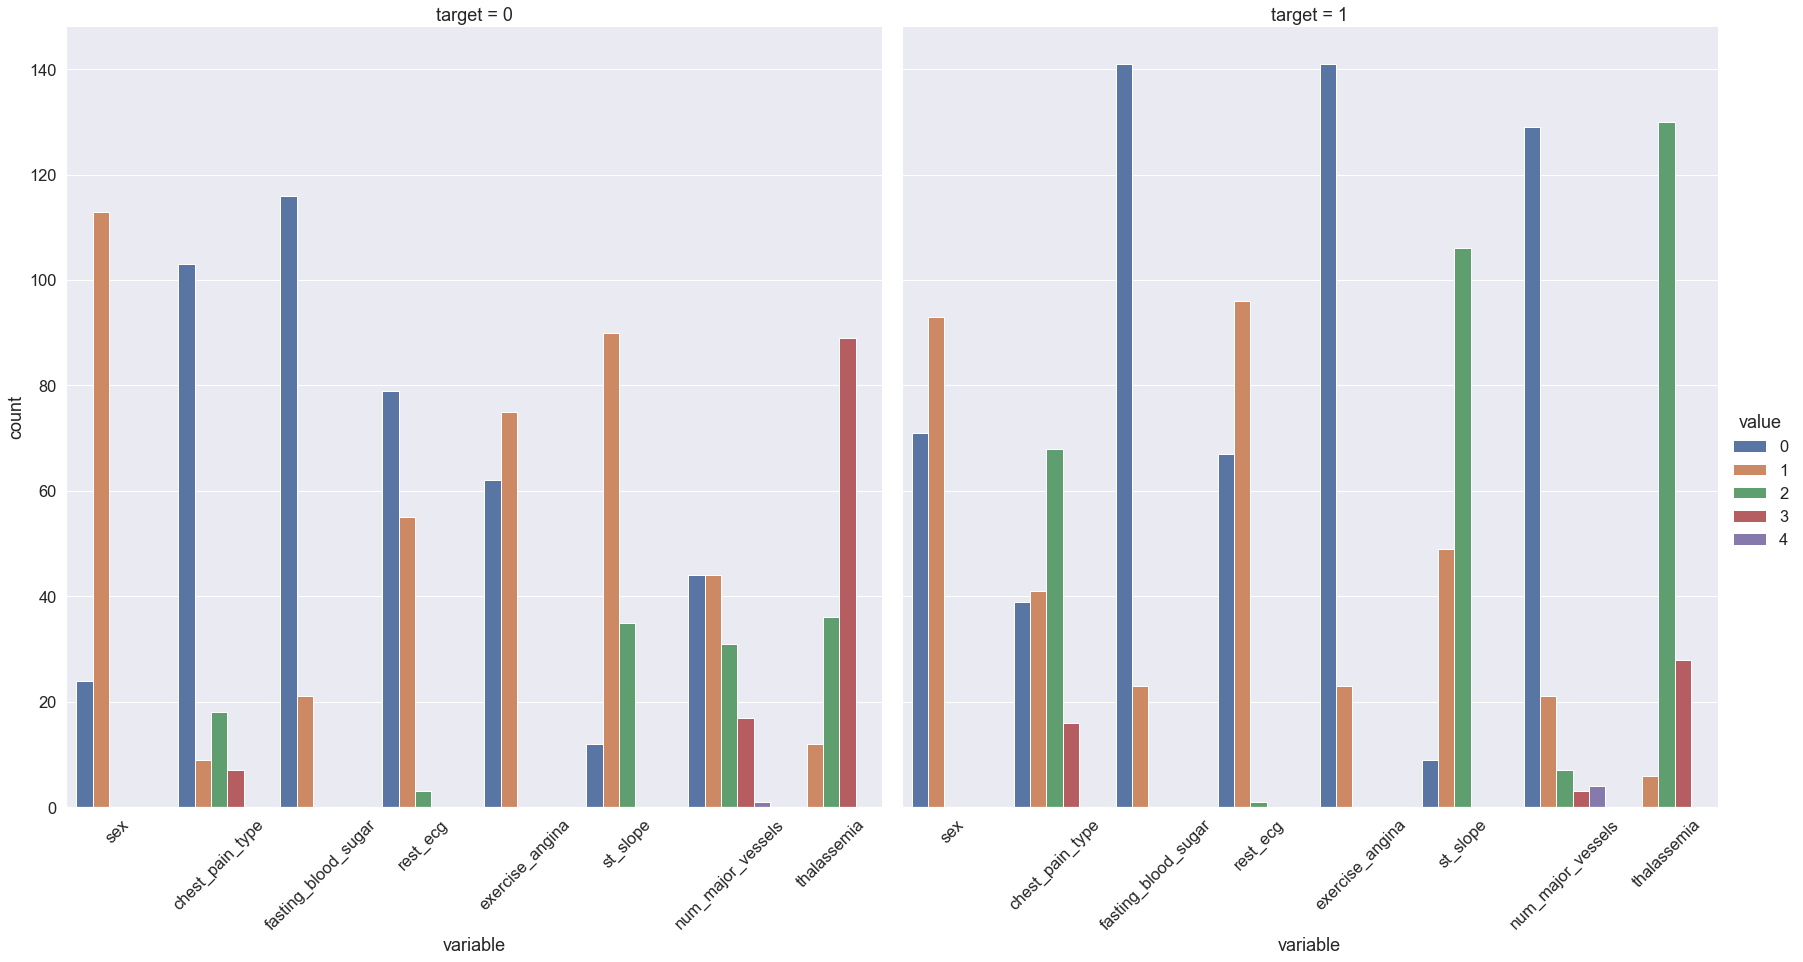

In [20]:
g = sns.factorplot(x = 'variable', y = 'count', hue = 'value',
              col = 'target', data = df_uniques, kind = 'bar', size = 12,
              order = categorical_feature)
for idx, ax in g.axes_dict.items():
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

Look at each categorical variables separately.

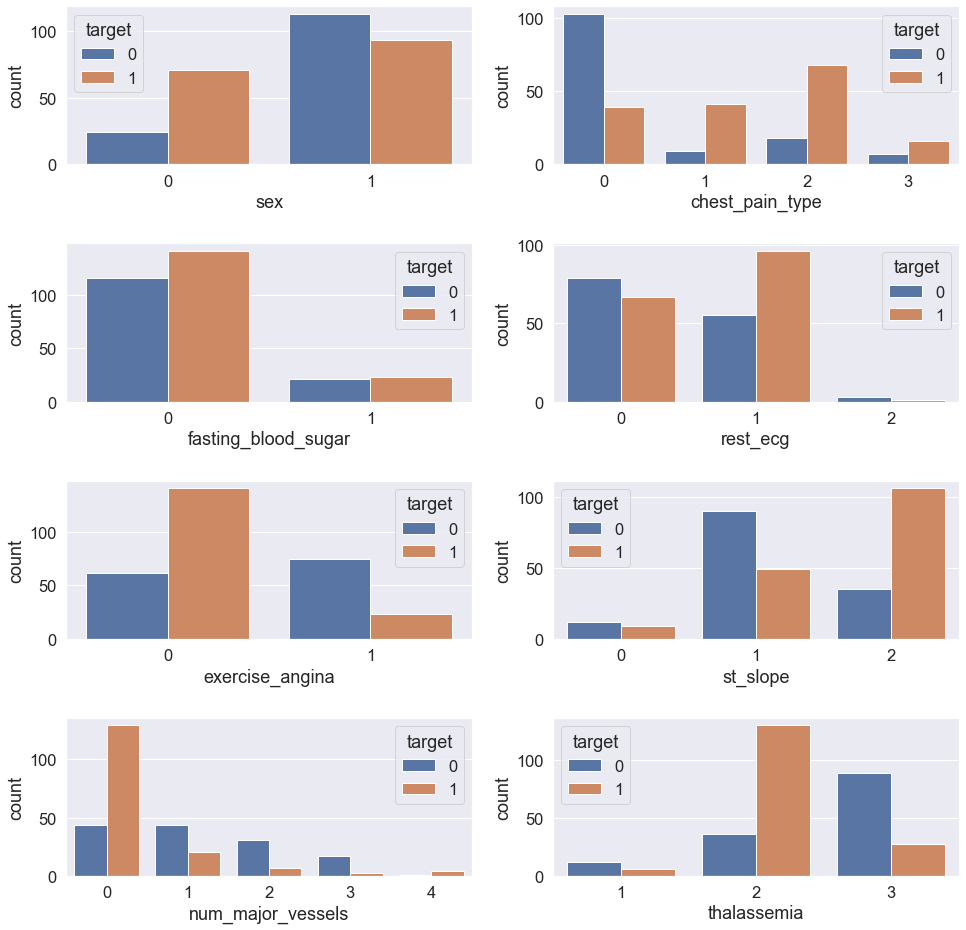

In [21]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (16, 16))
plt.subplots_adjust(hspace = 0.5) # amount of height reserved for white space between subplots, without this x label will be covered by plots above.

for idx, feat in enumerate(categorical_feature):
    sns.countplot(x = feat, hue = 'target', data = df_cat, ax = axes[idx //2, idx % 2])

In [22]:
df_cat['num_major_vessels'].value_counts()

0    173
1     65
2     38
3     20
4      5
Name: num_major_vessels, dtype: int64

In [23]:
df_cat[df_cat['num_major_vessels'] == 4].target.value_counts()

1    4
0    1
Name: target, dtype: int64

#### 2.4.2 Numerical variables

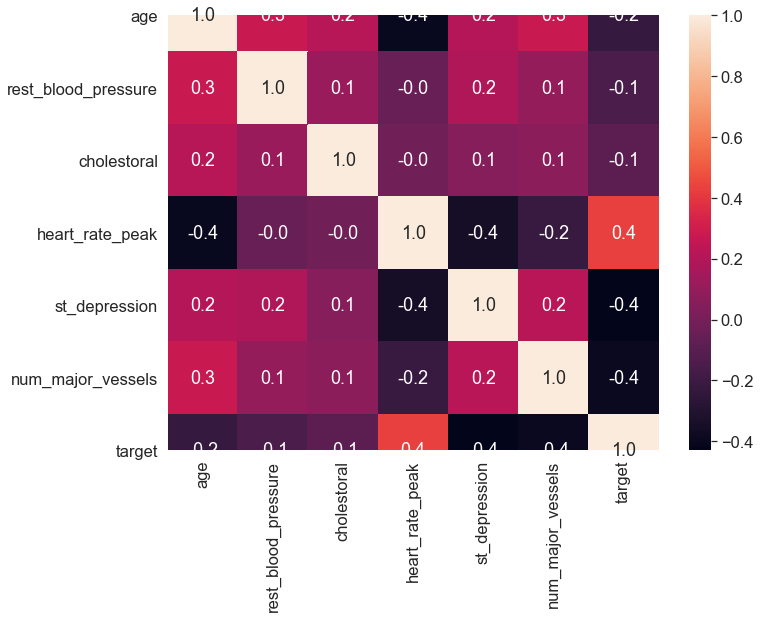

In [24]:
sns.heatmap(df_cat.corr(), annot = True, fmt = '.1f');

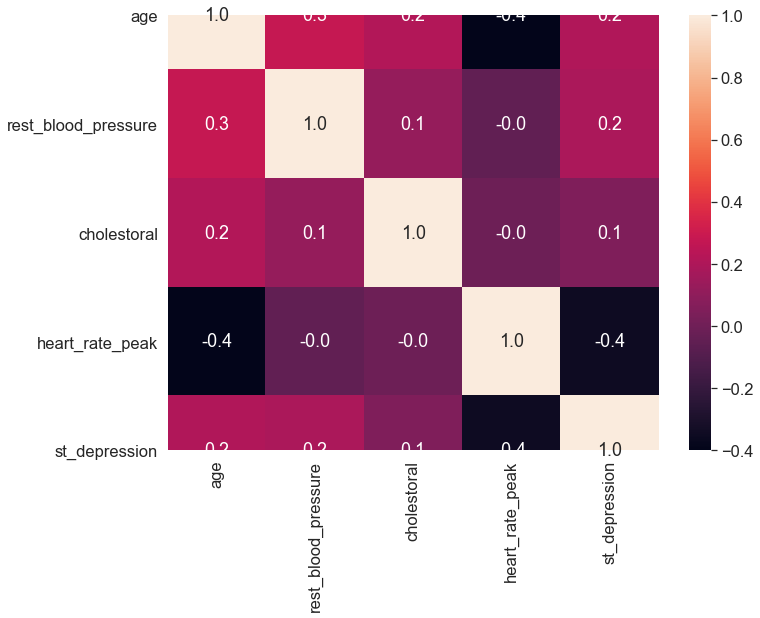

In [25]:
sns.heatmap(df_cat[numerical].corr(), annot = True, fmt = '.1f');

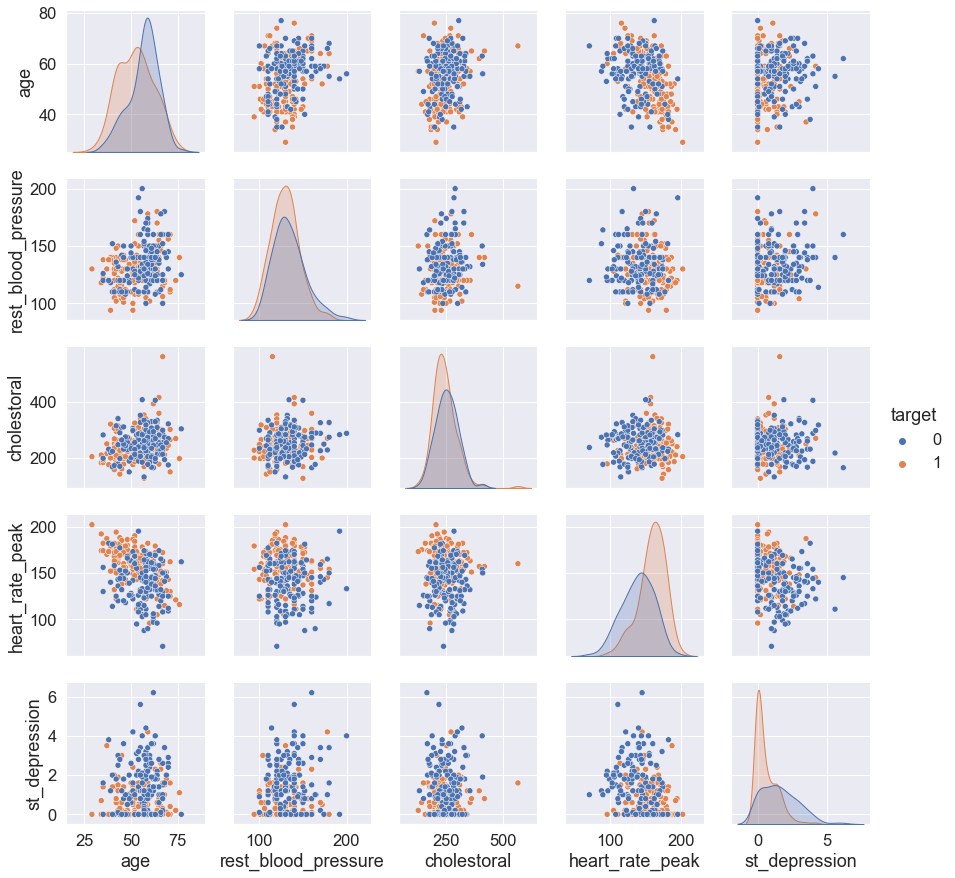

In [26]:
sns.pairplot(df_cat[numerical + ["target"]],
             hue = "target", diag_kind = "kde");

 Almost all features look similiar to normal distribution. Abnormality can be noted in `age` with heart disease and in `st_depression` without heart disease.

**Conclusions from the plots:**
* Female is more likely to have heart disease.
* Chest pain other than typical angina are reported more often among patients with heard disease, compared to those without.
* Fasting blood sugar rarely has anything to do with heart disease diagnosis.
* Abnormal resting electrocardiographic are more likely to be found among patients with heart disease.
* Exercise induced angina are reported more among patients without heart disease. For those who have heart disease, however, reported more angina potentially not induced by exercise.
* Heart disease patients are more likely to have downsloping peak exercise ST segment.
* Patients who do not have any major vessels are more likely to suffer from heart disease.
* Heart disease patients are more likely to have fixed effect thalassemia.

## 3. Models

### 3.1 Data preprocessing



#### 3.1.1Recoding categorical variables

Assign meaningful labels to each level of the categorical variables.

First, check if the mapping is correct for each variable.

In [27]:
df_cat['sex'].cat.categories

Int64Index([0, 1], dtype='int64')

In [28]:
df_cat['chest_pain_type'].cat.categories

Int64Index([0, 1, 2, 3], dtype='int64')

In [29]:
df_cat['fasting_blood_sugar'].cat.categories

Int64Index([0, 1], dtype='int64')

In [30]:
df_cat['rest_ecg'].cat.categories

Int64Index([0, 1, 2], dtype='int64')

In [31]:
df_cat['exercise_angina'].cat.categories

Int64Index([0, 1], dtype='int64')

In [32]:
df_cat['st_slope'].cat.categories

Int64Index([0, 1, 2], dtype='int64')

In [33]:
df_cat['thalassemia'].cat.categories

Int64Index([1, 2, 3], dtype='int64')

df_cat['sex'] = df_cat['sex'].cat.set_categories(new_categories=['female', 'male'], rename=True)

df_cat['chest_pain_type'] = df_cat['chest_pain_type'].cat.set_categories(new_categories=['typical angina', 
                                                                                         'atypical angina', 
                                                                                         'non-anginal pain', 
                                                                                         'asymptomatic'], rename=True)

df_cat['fasting_blood_sugar'] = df_cat['fasting_blood_sugar'].cat.set_categories(new_categories=['lower or equal to 120 mg/dl', 
                                                                                                 'greater than 120 mg/dl'], rename=True)

df_cat['rest_ecg'] = df_cat['rest_ecg'].cat.set_categories(new_categories=['normal', 
                                                                           'ST-T abnormality', 
                                                                           'left ventricular hypertrophy'], rename=True)

df_cat['exercise_angina'] = df_cat['exercise_angina'].cat.set_categories(new_categories=['no', 'yes'], rename=True)

df_cat['st_slope'] = df_cat['st_slope'].cat.set_categories(new_categories=['upsloping', 
                                                                           'flat', 
                                                                           'downsloping'], rename=True)

df_cat['thalassemia'] = df_cat['thalassemia'].cat.set_categories(new_categories=['normal', 
                                                                           'fixed defect', 
                                                                           'reversable defect'], rename=True)

df_cat.head()


#### 3.1.2 Dummy coding and split data



In [34]:
df_cat = pd.get_dummies(df_cat)
df_cat.head()

,age,rest_blood_pressure,cholestoral,heart_rate_peak,st_depression,num_major_vessels,target,sex_0,sex_1,chest_pain_type_0,...,rest_ecg_1,rest_ecg_2,exercise_angina_0,exercise_angina_1,st_slope_0,st_slope_1,st_slope_2,thalassemia_1,thalassemia_2,thalassemia_3
0,63,145,233,150,2.3,0,1,0,1,0,...,0,0,1,0,1,0,0,1,0,0
1,37,130,250,187,3.5,0,1,0,1,0,...,1,0,1,0,1,0,0,0,1,0
2,41,130,204,172,1.4,0,1,1,0,0,...,0,0,1,0,0,0,1,0,1,0
3,56,120,236,178,0.8,0,1,0,1,0,...,1,0,1,0,0,0,1,0,1,0
4,57,120,354,163,0.6,0,1,1,0,1,...,1,0,0,1,0,0,1,0,1,0


Split data.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(df_cat.drop('target', 1), df_cat['target'], test_size = .3,
                                                   random_state = 3)

### 3.2 Metrics selection and model selection

#### 3.2.1 Choice of metrics

Diagnostics are often sold, cited and used with **sensitivity** and **specificity**. **Accuracy** and **F beta** score will also be calculated for each model.

$ Sensitivity = \frac{True Positives}{True Positives + False Negatives} $

$ Specificity = \frac{True Negatives}{True Negatives + False Positives} $

$ Accuracy = \frac{TP + TN}{TP + FP + TN + FN} $

$ precision = \frac{TP}{TP + FP} $

$ recall = \frac{TP}{TP + FN} $

$ F_{beta} = (1 + \beta^{2})\frac{precision * recall}{\beta^{2}*precision + recall} $

Also, in `confusion_matrix(y_true, y_pred)`, the count of **TN** is $C_{0,0}$, **FN** is $C_{1,0}$, **TP** is $C_{1,1}$, **FP** is $C_{0,1}$

#### 3.2.2 Choice of models

I am solving binary classification, popular algorithms that can be used for this type of probles are:
- Logistic Regreesion
- k-Nearest Neighbors
- Decision Trees
- Support Vector Machine
- Naive Bayes

### 3.3 Fitting and training models

In [36]:
# `conda install py-xgboost` in terminal
# import xgboost as xgb

classifier = [LogisticRegression(random_state = 3), # setting multi_class as binary
              RidgeClassifier(random_state = 3),
              DecisionTreeClassifier(random_state = 3),
              KNeighborsClassifier(n_neighbors = 10),
              SVC(random_state = 3, kernel='linear', C=0.1), # kernel should be linear
              GaussianNB()
             ]
#xgb.XGBClassifier(learning_rate = 0.1, max_depth = 5, n_estimators = 40, min_child_weight = 3)

from sklearn.metrics import recall_score

In [37]:
scores = []
model_name = []
for model in classifier:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_name.append(model.__class__.__name__)
    scores.append(({
        'accuracy': accuracy_score(y_test, y_pred),
        'sensitivity': recall_score(y_test, y_pred, pos_label = 1), # when postive  = 1, sensitivity = recall
        'specificity': recall_score(y_test, y_pred, pos_label = 0), # when positive = 0, specificity = recall
        'f_beta': fbeta_score(y_test, y_pred, beta = 1, average = "weighted")  # beta = 1, f_beta = f1
    }))

results = pd.DataFrame(data = scores, columns = ['Models', 'accuracy', 'sensitivity', 'specificity', 'f_beta'])
results['Models'] = model_name

In [38]:
results

,Models,accuracy,sensitivity,specificity,f_beta
0,LogisticRegression,0.857143,0.927273,0.750000,0.854918
1,RidgeClassifier,0.846154,0.945455,0.694444,0.841754
2,DecisionTreeClassifier,0.659341,0.781818,0.472222,0.651188
3,KNeighborsClassifier,0.593407,0.636364,0.527778,0.595839
4,SVC,0.846154,0.945455,0.694444,0.841754
5,GaussianNB,0.802198,0.945455,0.583333,0.792146


According to **F beta** score, the best model is `LogisticRegression`, the same is true for its **accuracy**, **sensitivity** and **specificity**.

### 3.4 Cross-validation and hyperparameter tuning

In [39]:
kfold = KFold(n_splits = 3, shuffle = True, random_state = 3)

I will cross-validate and tune the top 3 models (using `GridSearch`) here. Namely `LogisticRegression`, `SVC`, and `RidgeClassifier`.

In [40]:
classifier2 = [LogisticRegression(random_state = 3), # setting multi_class as binary
               SVC(random_state = 3, kernel = 'linear', C = 0.1), # kernel should be linear
               RidgeClassifier(random_state = 3)
             ]

In [52]:
param_lr = {'penalty': ['l1', 'l2'],
           'C': [0.01, 0.05, 0.1, 0.5, 1]}
param_svc = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'C': [0.1, 0.5, 1, 1.5, 2, 2.5, 5],
            'decision_function_shape': ['ovo', 'ovr']}
param_ridge = {'alpha': [0.001, 0.01, 0.1, 1]}

param_grid = [param_lr, param_svc, param_ridge]

In [53]:
%%time

scores2 = []
model_name = []
for i in enumerate(classifier2):
    grid_cv = GridSearchCV(classifier2[i[0]], param_grid[i[0]], cv = kfold)
    grid = grid_cv.fit(X_train, y_train.values)
    print(classifier2[i[0]], grid_cv.best_params_)
    cv_pred = grid_cv.best_estimator_.predict(X_test)
    model_name.append(classifier2[i[0]].__class__.__name__)
    scores2.append(({
        'accuracy': accuracy_score(y_test, cv_pred),
        'sensitivity': recall_score(y_test, cv_pred, pos_label = 1), # when postive  = 1, sensitivity = recall
        'specificity': recall_score(y_test, cv_pred, pos_label = 0), # when positive = 0, specificity = recall
        'f_beta': fbeta_score(y_test, cv_pred, beta = 1, average = "weighted")  # beta = 1, f_beta = f1
    }))

results2 = pd.DataFrame(data = scores2, columns = ['Models', 'accuracy', 'sensitivity', 'specificity', 'f_beta'])
results2['Models'] = model_name

LogisticRegression(random_state=3) {'C': 0.1, 'penalty': 'l2'}
SVC(C=0.1, kernel='linear', random_state=3) {'C': 0.5, 'decision_function_shape': 'ovo', 'kernel': 'linear'}
RidgeClassifier(random_state=3) {'alpha': 1}
CPU times: user 17.4 s, sys: 138 ms, total: 17.5 s
Wall time: 17.8 s


In [54]:
results2

,Models,accuracy,sensitivity,specificity,f_beta
0,LogisticRegression,0.835165,0.927273,0.694444,0.831220
1,SVC,0.846154,0.927273,0.722222,0.843140
2,RidgeClassifier,0.846154,0.945455,0.694444,0.841754


No change in accuracy except a slight decrease in `LogisticRregression`.

## 4. Explanation

Let's take a deeper look at our `LogisticRegression` model using **permutation importance**. It gives feature importance by randoomly shuffling a single column of the validataion data (after model has been fitted) which affects model accuracy.

In [44]:
# pip install eli5

import eli5
from eli5.sklearn import PermutationImportance

In [65]:
# these are my best models
lr = LogisticRegression(random_state = 3, C = 0.5, max_iter = 100, penalty = 'l2').fit(X_train, y_train)
svc = SVC(random_state = 3, C = 0.5, kernel='linear', decision_function_shape = 'ovo').fit(X_train, y_train)
ridge = RidgeClassifier(random_state = 3, alpha = 1).fit(X_train, y_train)

In [58]:
perm_lr = PermutationImportance(lr, random_state = 3).fit(X_test, y_test)
eli5.show_weights(perm_lr, feature_names = X_test.columns.tolist())

Weight,Feature
0.0615 ± 0.0646,num_major_vessels
0.0571 ± 0.0256,heart_rate_peak
0.0462 ± 0.0088,chest_pain_type_0
0.0418 ± 0.0215,st_depression
0.0242 ± 0.0215,chest_pain_type_2
0.0242 ± 0.0164,exercise_angina_1
0.0220 ± 0.0139,thalassemia_2
0.0198 ± 0.0088,chest_pain_type_3
0.0176 ± 0.0176,rest_ecg_0
0.0176 ± 0.0176,age


In [66]:
perm_svc = PermutationImportance(svc, random_state = 3).fit(X_test, y_test)
eli5.show_weights(perm_svc, feature_names = X_test.columns.tolist())

Weight,Feature
0.0505 ± 0.0841,num_major_vessels
0.0440 ± 0.0197,chest_pain_type_0
0.0198 ± 0.0088,chest_pain_type_3
0.0154 ± 0.0108,st_slope_1
0.0154 ± 0.0298,thalassemia_3
0.0132 ± 0.0292,heart_rate_peak
0.0110 ± 0.0197,exercise_angina_1
0.0110 ± 0.0139,rest_ecg_0
0.0088 ± 0.0215,st_depression
0.0088 ± 0.0164,chest_pain_type_2


In [67]:
perm_ridge = PermutationImportance(ridge, random_state = 3).fit(X_test, y_test)
eli5.show_weights(perm_ridge, feature_names = X_test.columns.tolist())

Weight,Feature
0.0440 ± 0.0139,chest_pain_type_0
0.0396 ± 0.0743,num_major_vessels
0.0352 ± 0.0256,heart_rate_peak
0.0308 ± 0.0292,thalassemia_2
0.0286 ± 0.0298,rest_ecg_1
0.0198 ± 0.0164,st_depression
0.0154 ± 0.0108,chest_pain_type_2
0.0132 ± 0.0256,st_slope_1
0.0110 ± 0.0197,chest_pain_type_3
0.0110 ± 0.0000,thalassemia_1


All three models yielde similiar top 3 important features:

- `num_major_vessels`
- `heart_rate_peak`
- `chest_pain_type_0` which is typical angina


Next, I will take a closer look into these features using **Partial Dependence Plots**. These plots tell me that when controlling for all other features, what is the impact of this feature under examination on `target`. In logistic regression, this is similar to coefficients.

In [47]:
# pip install pdpbox

from pdpbox import pdp, info_plots

In [68]:
# create the data that I will plot

base_feat = df_cat.columns.values.tolist()
base_feat.remove('target')

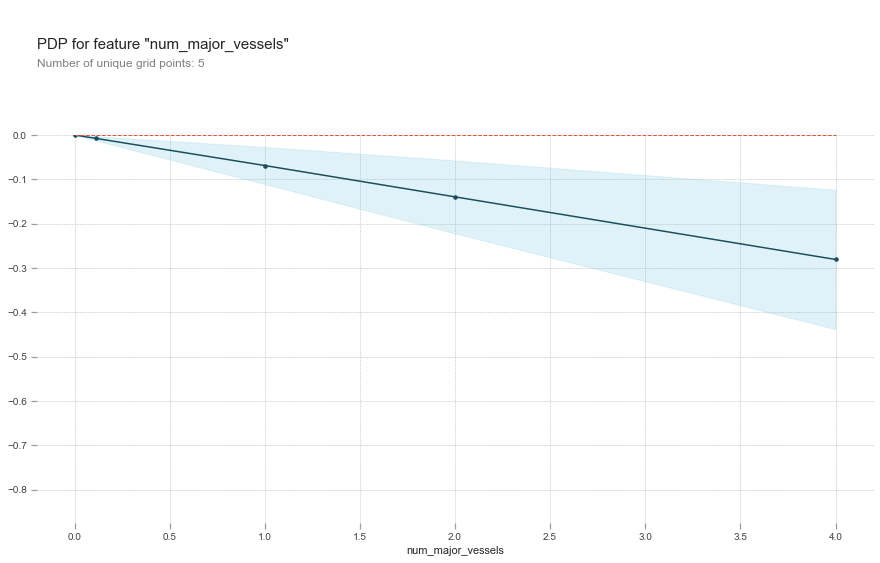

In [69]:
feat_name = 'num_major_vessels'
pdp_dist = pdp.pdp_isolate(model = lr, dataset = X_train, model_features = base_feat, feature = feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

The number of major vessels increases, the probability of heart disease decreases.

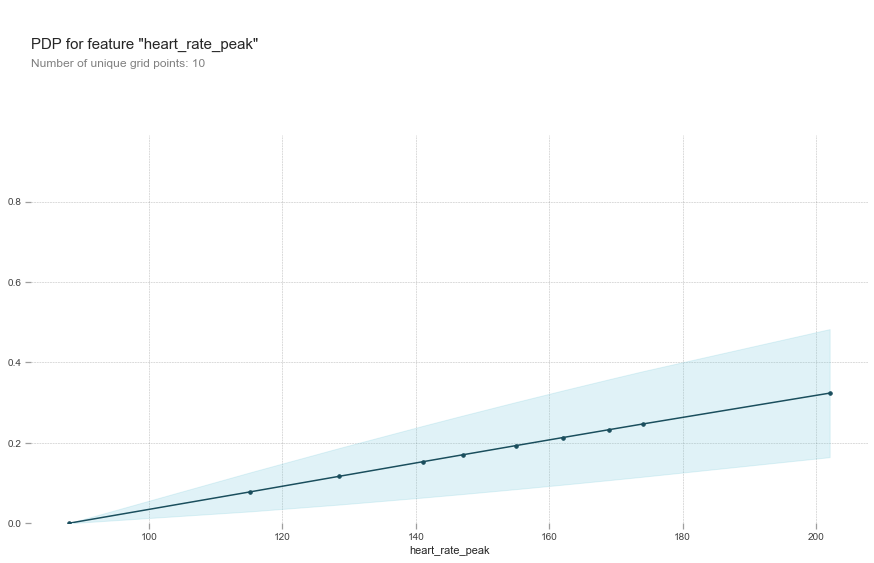

In [70]:
feat_name = 'heart_rate_peak'
pdp_dist = pdp.pdp_isolate(model = lr, dataset = X_train, model_features = base_feat, feature = feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

The peak heart rate increases, the probablity of heart disease increases.

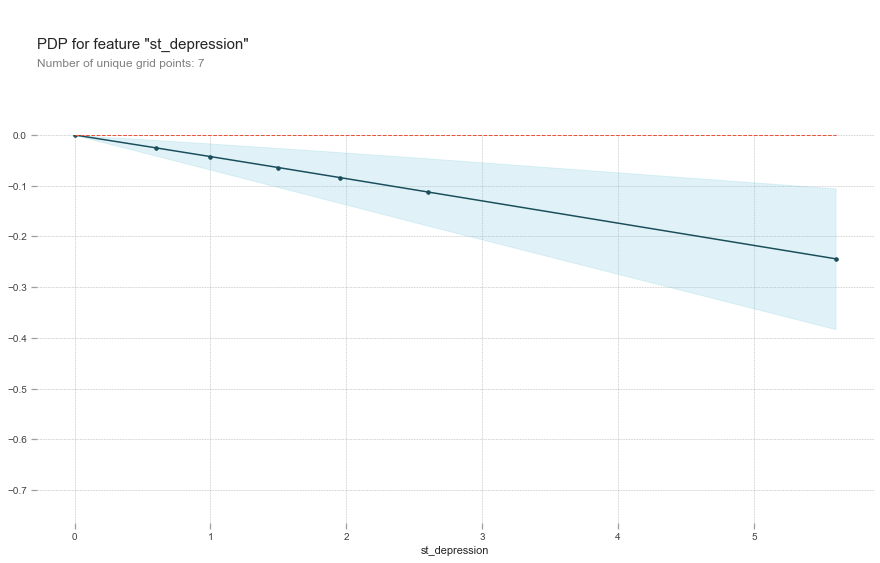

In [71]:
feat_name = 'st_depression'
pdp_dist = pdp.pdp_isolate(model = lr, dataset = X_train, model_features = base_feat, feature = feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()